In [50]:
#Importing Needed Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import cufflinks as cf
import yfinance as yf
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()
%matplotlib inline

In [51]:
#Reading database file as weather_df and making date_time column as index of dataframe
weather_df = pd.read_excel('TataData.xlsx', parse_dates=['Datetime'], index_col='Datetime')
weather_df.head(5)

Batterie (V)  Rayonnement global (j/cm²)  Température (°C)  \
Datetime                                                                 
2012-06-22          6.76                     2728.52             35.10   
2012-06-23          6.76                     1778.98             35.54   
2012-06-24          6.73                     1402.39             34.72   
2012-06-25          6.76                     1907.94             36.30   
2012-06-26          6.76                     2204.78             37.07   

            ETo (mm)  Humidité relative (%)  Précipitation (mm)  \
Datetime                                                          
2012-06-22      7.43                  13.16                 0.0   
2012-06-23      6.64                  12.12                 0.0   
2012-06-24      6.21                  16.95                 0.0   
2012-06-25      6.36                  13.10                 0.0   
2012-06-26      7.34                  13.08                 0.2   

            Vitesse du vent (km/h)  Direction du vent (°)  tempmax  tempmin  \
Datetime                                                                      
2012-06-22                   12.88                 166.57     41.8     23.7   
2012-06-23                   24.33                 125.53     43.9     26.7   
2012-06-24                   18.74                 153.65     40.0     25.8   
2012-06-25                   18.84                 154.63     43.4     29.1   
2012-06-26                   18.36                 181.03     42.3     28.2   

            ...  precip  precipprob  precipcover  windspeed  winddir  \
Datetime    ...                                                        
2012-06-22  ...     0.0           0          0.0       30.6    253.5   
2012-06-23  ...     0.0           0          0.0       25.6    128.5   
2012-06-24  ...     0.0           0          0.0       19.8    122.7   
2012-06-25  ...     0.0           0          0.0       24.1    136.4   
2012-06-26  ...     0.0           0          0.0       24.5    118.8   

            cloudcover  solarradiation  solarenergy  uvindex        conditions  
Datetime                                                                        
2012-06-22         0.0           360.4         31.1       10             Clear  
2012-06-23         4.8           321.3         27.7       10             Clear  
2012-06-24        46.6           234.4         20.2        8  Partially cloudy  
2012-06-25        60.8           290.6         25.2       10  Partially cloudy  
2012-06-26        68.9           229.4         19.9        7  Partially cloudy  

[5 rows x 26 columns]

In [52]:
weather_df.dtypes

Batterie (V)                  float64
Rayonnement global (j/cm²)    float64
Température (°C)              float64
ETo (mm)                      float64
Humidité relative (%)         float64
Précipitation (mm)            float64
Vitesse du vent (km/h)        float64
Direction du vent (°)         float64
tempmax                       float64
tempmin                       float64
temp                          float64
feelslikemax                  float64
feelslikemin                  float64
feelslike                     float64
dew                           float64
humidity                      float64
precip                        float64
precipprob                      int64
precipcover                   float64
windspeed                     float64
winddir                       float64
cloudcover                    float64
solarradiation                float64
solarenergy                   float64
uvindex                         int64
conditions                     object
dtype: objec

In [53]:
weather_df.describe()

Batterie (V)  Rayonnement global (j/cm²)  Température (°C)  \
count   3645.000000                 2890.000000       3645.000000   
mean       6.872137                 2012.106471         24.747292   
std        0.125527                  634.179410          8.347116   
min        6.440000                    0.000000          7.300000   
25%        6.790000                 1482.915000         17.310000   
50%        6.860000                 2017.585000         24.460000   
75%        6.960000                 2564.585000         32.250000   
max        7.160000                 3162.170000         41.900000   

          ETo (mm)  Humidité relative (%)  Précipitation (mm)  \
count  3645.000000            3645.000000         3645.000000   
mean      4.700938              12.504310            0.221838   
std       2.451765               8.537735            2.374180   
min       0.000000               1.840000            0.000000   
25%       2.700000               6.630000            0.000000   
50%       4.390000              10.230000            0.000000   
75%       6.570000              15.820000            0.000000   
max      12.140000              82.780000           84.800000   

       Vitesse du vent (km/h)  Direction du vent (°)      tempmax  \
count             3645.000000            2890.000000  3653.000000   
mean                14.061619             175.754765    31.285847   
std                  5.575256              44.996052     8.699604   
min                  3.670000              59.990000     6.900000   
25%                  9.710000             141.210000    23.800000   
50%                 13.390000             172.345000    31.100000   
75%                 17.780000             211.145000    39.200000   
max                 39.080000             274.150000    46.900000   

           tempmin  ...     humidity       precip   precipprob  precipcover  \
count  3653.000000  ...  3653.000000  3653.000000  3653.000000  3653.000000   
mean     16.291185  ...    31.356118     0.325185     9.690665     3.036340   
std       7.715334  ...    14.532989     2.474187    29.587111    12.445926   
min      -1.500000  ...     7.100000     0.000000     0.000000     0.000000   
25%       9.500000  ...    19.800000     0.000000     0.000000     0.000000   
50%      15.800000  ...    29.100000     0.000000     0.000000     0.000000   
75%      22.700000  ...    40.100000     0.000000     0.000000     0.000000   
max      33.400000  ...    87.700000    55.400000   100.000000   100.000000   

         windspeed      winddir   cloudcover  solarradiation  solarenergy  \
count  3653.000000  3653.000000  3653.000000     3653.000000  3653.000000   
mean     25.859923   200.833014    23.397126      260.107446    22.458719   
std       8.294462    87.130450    26.764574       73.651711     6.346451   
min       7.200000    27.100000     0.000000       51.200000     4.400000   
25%      19.400000   124.100000     0.800000      193.600000    16.700000   
50%      25.900000   198.400000    12.300000      265.200000    22.900000   
75%      31.700000   286.400000    39.600000      325.900000    28.200000   
max      58.700000   343.500000    97.700000      392.700000    32.900000   

           uvindex  
count  3653.000000  
mean      8.554065  
std       1.566924  
min       2.000000  
25%       7.000000  
50%       9.000000  
75%      10.000000  
max      10.000000  

[8 rows x 25 columns]

In [54]:
MissingValues = weather_df.isnull()
Sum=MissingValues.sum()
Sum

Batterie (V)                    8
Rayonnement global (j/cm²)    763
Température (°C)                8
ETo (mm)                        8
Humidité relative (%)           8
Précipitation (mm)              8
Vitesse du vent (km/h)          8
Direction du vent (°)         763
tempmax                         0
tempmin                         0
temp                            0
feelslikemax                    0
feelslikemin                    0
feelslike                       0
dew                             0
humidity                        0
precip                          0
precipprob                      0
precipcover                     0
windspeed                       0
winddir                         0
cloudcover                      0
solarradiation                  0
solarenergy                     0
uvindex                         0
conditions                      0
dtype: int64

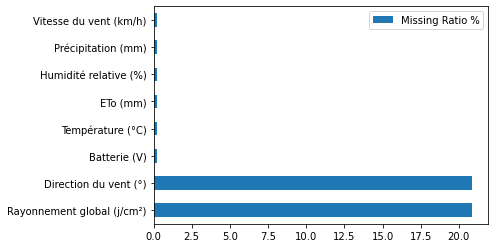

In [55]:
df=weather_df
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [56]:
weather_df['Batterie (V)'].fillna(value=6.872137, inplace=True)
weather_df['Rayonnement global (j/cm²)'].fillna(value=2012.106471, inplace=True)
weather_df['Température (°C)'].fillna(value=24.747292, inplace=True)
weather_df['ETo (mm)'].fillna(value=4.700938, inplace=True)
weather_df['Humidité relative (%)'].fillna(value=12.504310, inplace=True)
weather_df['Précipitation (mm)'].fillna(value=0.221838, inplace=True)
weather_df['Vitesse du vent (km/h)'].fillna(value=14.061619, inplace=True)
weather_df['Direction du vent (°)'].fillna(value=175.754765, inplace=True)

In [57]:
df=weather_df
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

No NAs found


<AxesSubplot:>

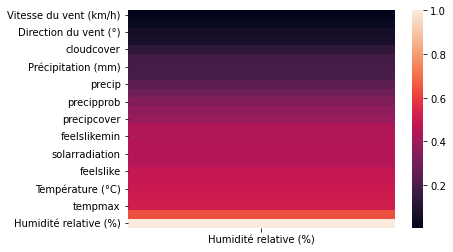

In [58]:
sns.heatmap(weather_df.corr().abs()[['Humidité relative (%)']].sort_values('Humidité relative (%)'))

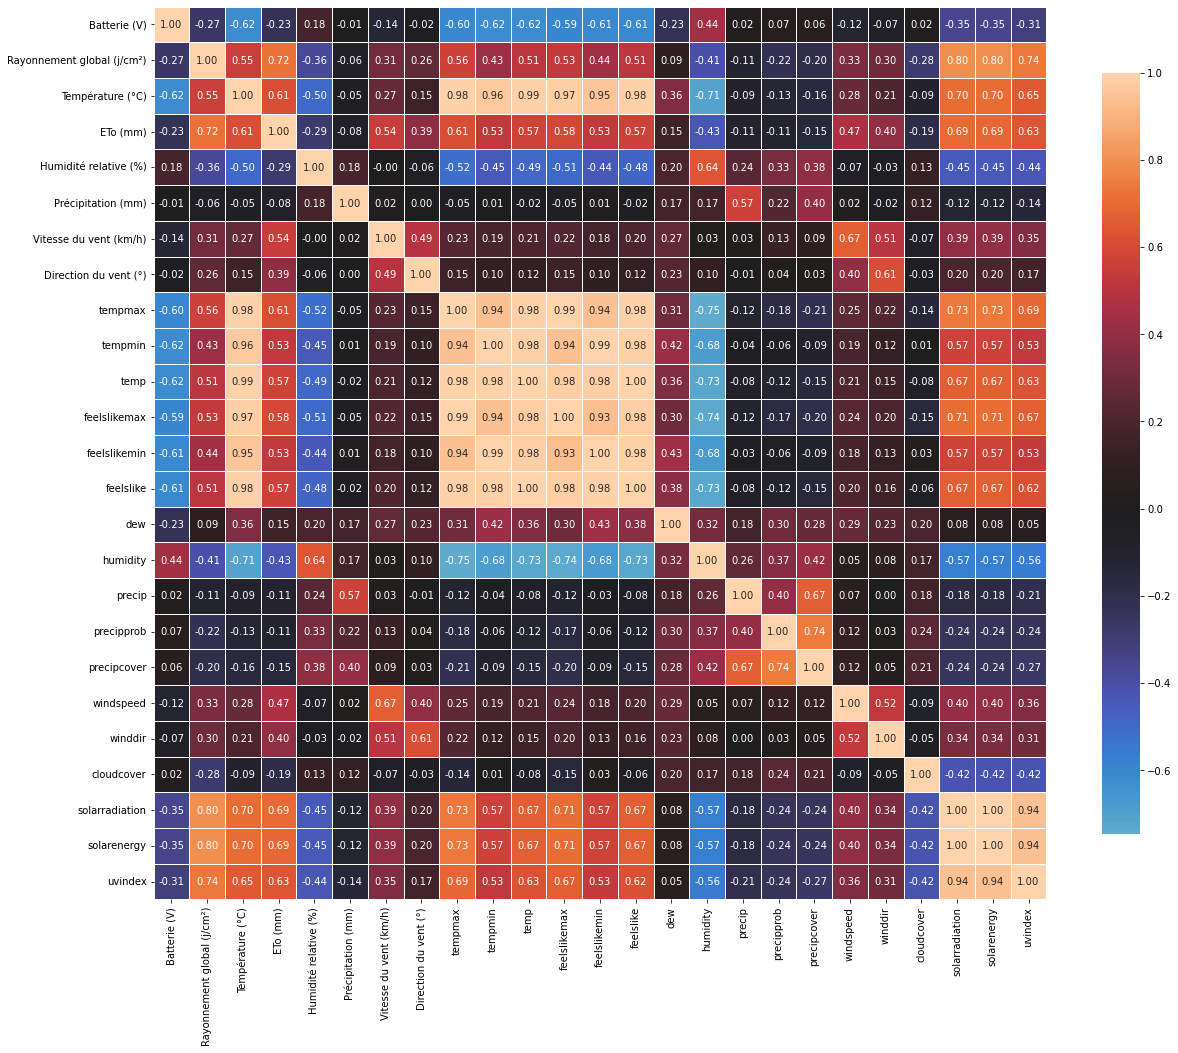

In [59]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(weather_df)

In [60]:
weather_df_num=weather_df.loc[:,['Humidité relative (%)','tempmax','tempmin','temp','humidity','precipcover','solarradiation','solarenergy','uvindex']]

In [61]:
weather_df_num.head()

Humidité relative (%)  tempmax  tempmin  temp  humidity  \
Datetime                                                              
2012-06-22                  13.16     41.8     23.7  33.3      15.1   
2012-06-23                  12.12     43.9     26.7  35.2      11.2   
2012-06-24                  16.95     40.0     25.8  33.7      14.6   
2012-06-25                  13.10     43.4     29.1  36.3      14.6   
2012-06-26                  13.08     42.3     28.2  35.8      15.5   

            precipcover  solarradiation  solarenergy  uvindex  
Datetime                                                       
2012-06-22          0.0           360.4         31.1       10  
2012-06-23          0.0           321.3         27.7       10  
2012-06-24          0.0           234.4         20.2        8  
2012-06-25          0.0           290.6         25.2       10  
2012-06-26          0.0           229.4         19.9        7

In [62]:
#on va tester les 3 modules
#1- Multiple Linear Regression
#2- Decision Tree Regression
#3-  Random Forest Regression
#4- polynomial regression

In [63]:
weather_y=weather_df_num.pop("Humidité relative (%)")
weather_x=weather_df_num
#weather_y
weather_x

tempmax  tempmin  temp  humidity  precipcover  solarradiation  \
Datetime                                                                    
2012-06-22     41.8     23.7  33.3      15.1         0.00           360.4   
2012-06-23     43.9     26.7  35.2      11.2         0.00           321.3   
2012-06-24     40.0     25.8  33.7      14.6         0.00           234.4   
2012-06-25     43.4     29.1  36.3      14.6         0.00           290.6   
2012-06-26     42.3     28.2  35.8      15.5         0.00           229.4   
...             ...      ...   ...       ...          ...             ...   
2022-06-18     41.2     30.0  36.2      11.7         0.00           364.8   
2022-06-19     41.0     30.0  35.9      12.3         0.00           371.3   
2022-06-20     37.5     30.1  33.8      19.8         8.33           300.7   
2022-06-21     35.7     26.5  30.8      43.8         4.17           292.8   
2022-06-22     38.0     25.2  31.1      31.8         0.00           337.5   

            solarenergy  uvindex  
Datetime                          
2012-06-22         31.1       10  
2012-06-23         27.7       10  
2012-06-24         20.2        8  
2012-06-25         25.2       10  
2012-06-26         19.9        7  
...                 ...      ...  
2022-06-18         31.5       10  
2022-06-19         32.0       10  
2022-06-20         25.7       10  
2022-06-21         25.2       10  
2022-06-22         29.1       10  

[3653 rows x 8 columns]

In [64]:
#Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.1,random_state=4)

In [65]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [66]:
prediction = model.predict(test_X)

In [67]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 4.14
R2-score: 0.49


In [68]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

Actual  Prediction   diff
Datetime                             
2020-02-22    8.94        9.74  -0.80
2021-06-02    6.76        9.33  -2.57
2013-05-19   19.51        7.76  11.75
2015-11-23    9.25       12.60  -3.35
2013-08-05   12.39        6.63   5.76
...            ...         ...    ...
2018-09-11   19.37       19.98  -0.61
2018-05-03   10.28       12.14  -1.86
2015-02-26    9.26       14.39  -5.13
2019-04-08    8.15       10.99  -2.84
2015-07-07    6.33        9.67  -3.34

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

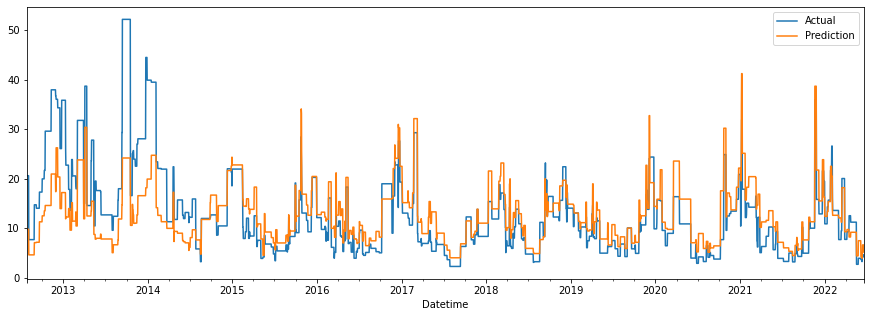

In [69]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [70]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Multiple Linear Regression ',subplots=False)

In [71]:
#Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [73]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

5.325928961748634

In [74]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 5.33
R2-score: -0.05


In [75]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: -0.05


In [76]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

Actual  Prediction   diff
Datetime                             
2020-02-22    8.94        4.99   3.95
2021-06-02    6.76        6.61   0.15
2013-05-19   19.51        6.30  13.21
2015-11-23    9.25        9.44  -0.19
2013-08-05   12.39       16.54  -4.15
...            ...         ...    ...
2018-09-11   19.37       36.97 -17.60
2018-05-03   10.28        9.46   0.82
2015-02-26    9.26       25.42 -16.16
2019-04-08    8.15        8.99  -0.84
2015-07-07    6.33        5.43   0.90

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

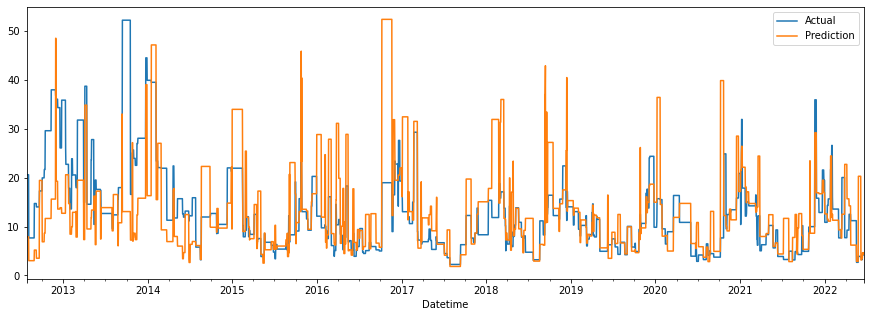

In [77]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction2})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [78]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction2})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Multiple Linear Regression ',subplots=False)

In [79]:
#Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [81]:
prediction3=regr.predict(test_X)

In [82]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 3.94
R2-score: 0.50


In [83]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

Actual  Prediction  diff
Datetime                            
2020-02-22    8.94        7.62  1.32
2021-06-02    6.76        7.55 -0.79
2013-05-19   19.51       12.45  7.06
2015-11-23    9.25       13.96 -4.71
2013-08-05   12.39        7.38  5.01
...            ...         ...   ...
2018-09-11   19.37       22.89 -3.52
2018-05-03   10.28       12.12 -1.84
2015-02-26    9.26       12.64 -3.38
2019-04-08    8.15       11.69 -3.54
2015-07-07    6.33        9.06 -2.73

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

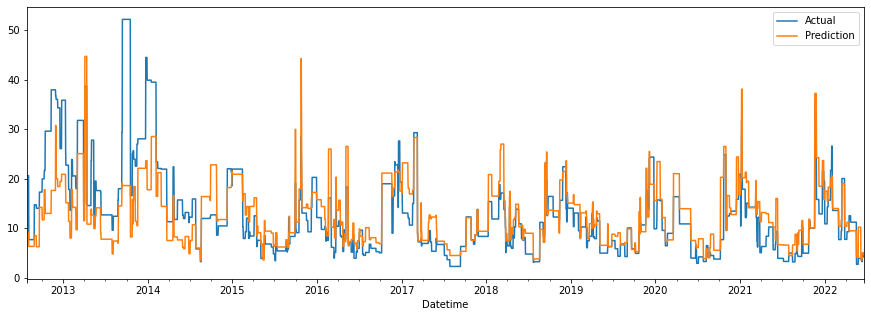

In [84]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction3})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [85]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction3})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Multiple Linear Regression ',subplots=False)

In [86]:
#Polynomial Regression

In [87]:
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
poly_regr = PolynomialFeatures(degree =3) # our polynomial model is of order
X_poly = poly_regr.fit_transform(train_X) # transforms the features to the polynomial form
polyReg = LinearRegression() # creates a linear regression object
polyReg.fit(X_poly, train_y) # fits the linear regression object to the polynomial features



LinearRegression()

In [88]:
prediction4=polyReg.predict(poly_regr.fit_transform(test_X))

In [89]:
for i in range(len(prediction4)):
  prediction4[i]=round(prediction4[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction4,'diff':(test_y-prediction4)})

Actual  Prediction  diff
Datetime                            
2020-02-22    8.94       11.55 -2.61
2021-06-02    6.76        9.25 -2.49
2013-05-19   19.51       15.23  4.28
2015-11-23    9.25       12.98 -3.73
2013-08-05   12.39        5.90  6.49
...            ...         ...   ...
2018-09-11   19.37       11.58  7.79
2018-05-03   10.28       14.14 -3.86
2015-02-26    9.26       13.03 -3.77
2019-04-08    8.15       11.02 -2.87
2015-07-07    6.33       10.00 -3.67

[366 rows x 3 columns]

In [90]:
np.mean(np.absolute(prediction4-test_y))

4.232716693989073

In [91]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction4 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction4 ) )

Mean absolute error: 4.23
R2-score: 0.39


<AxesSubplot:xlabel='Datetime'>

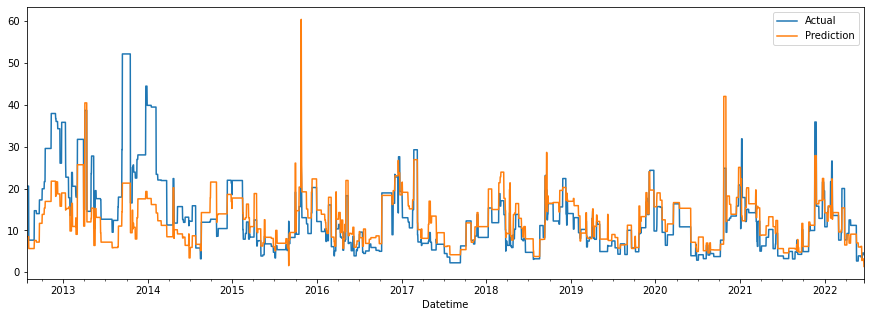

In [92]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction4})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [93]:
pd.DataFrame({'Actual':test_y,'Prediction':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Multiple Linear Regression ',subplots=False)

In [94]:
#Comparaison des 4 Model

In [106]:
pd.DataFrame({'Valeur réelle':test_y,'MLR Model':prediction,'DTR Model':prediction2,'RFR Model':prediction3,'PR Model':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Comparaison des predictions des modeles avec la valeur reelle mesuree ',subplots=False)

In [96]:
import requests
import json
response_API = requests.get('https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/tata%20maroc?unitGroup=metric&key=VSJTPURWV477GP6K5L8ZX8UWN&contentType=json')
df=response_API.json()
data=df['days']
data

[{'datetime': '2022-06-25',
  'datetimeEpoch': 1656111600,
  'tempmax': 36.8,
  'tempmin': 24.9,
  'temp': 30.8,
  'feelslikemax': 34.1,
  'feelslikemin': 24.9,
  'feelslike': 29.4,
  'dew': 7.0,
  'humidity': 23.8,
  'precip': 0.0,
  'precipprob': 0.0,
  'precipcover': 0.0,
  'preciptype': None,
  'snow': 0.0,
  'snowdepth': 0.0,
  'windgust': 31.3,
  'windspeed': 17.3,
  'winddir': 241.2,
  'pressure': 1007.0,
  'cloudcover': 0.0,
  'visibility': 24.1,
  'solarradiation': 371.5,
  'solarenergy': 32.1,
  'uvindex': 10.0,
  'severerisk': 10.0,
  'sunrise': '06:33:02',
  'sunriseEpoch': 1656135182,
  'sunset': '20:36:06',
  'sunsetEpoch': 1656185766,
  'moonphase': 0.95,
  'conditions': 'Clear',
  'description': 'Clear conditions throughout the day.',
  'icon': 'clear-day',
  'stations': ['remote'],
  'source': 'comb',
  'hours': [{'datetime': '00:00:00',
    'datetimeEpoch': 1656111600,
    'temp': 28.0,
    'feelslike': 27.0,
    'humidity': 28.18,
    'dew': 7.9,
    'precip': 0.0,
 

In [97]:
datetime=np.array([])
humidity=np.array([])
tempmax=np.array([])
tempmin=np.array([])
temp=np.array([])
precipcover=np.array([])
solarradiation=np.array([])
solarenergy=np.array([])
uvindex=np.array([])
#'tempmax','tempmin','temp','humidity','precipcover','solarradiation','solarenergy','uvindex'
for i in range(len(data)):
    datetime=np.append(datetime, data[i]['datetime'])
    humidity=np.append(humidity, data[i]['humidity'])
    tempmax=np.append(tempmax, data[i]['tempmax'])
    tempmin=np.append(tempmin, data[i]['tempmin'])
    temp=np.append(temp, data[i]['temp'])
    precipcover=np.append(precipcover, data[i]['precipcover'])
    solarradiation=np.append(solarradiation, data[i]['solarradiation'])
    solarenergy=np.append(solarenergy, data[i]['solarenergy'])
    uvindex=np.append(uvindex, data[i]['uvindex'])

In [98]:
xc=pd.DataFrame({'datetime':datetime,'tempmax':tempmax,'tempmin':tempmin,'temp':temp,'humidity':humidity,'precipcover':precipcover,'solarradiation':solarradiation,'solarenergy':solarenergy,'uvindex':uvindex})

In [99]:
xc.set_index(['datetime'],inplace = True)
xc

tempmax  tempmin  temp  humidity  precipcover  solarradiation  \
datetime                                                                    
2022-06-25     36.8     24.9  30.8      23.8          0.0           371.5   
2022-06-26     37.2     24.9  31.3      28.1          0.0           367.9   
2022-06-27     38.1     23.7  31.4      30.4          0.0           365.9   
2022-06-28     38.5     23.8  31.3      29.0          0.0           366.8   
2022-06-29     37.5     25.2  31.6      25.9          0.0           384.2   
2022-06-30     36.9     24.1  30.4      26.9          0.0           361.7   
2022-07-01     34.4     22.7  28.3      29.2          0.0           368.2   
2022-07-02     36.6     20.0  28.5      24.4          0.0           373.0   
2022-07-03     38.5     24.4  31.4      14.5          0.0           367.2   
2022-07-04     41.4     26.0  34.3      13.1          0.0           363.5   
2022-07-05     42.8     29.0  35.8      10.9          0.0           363.3   
2022-07-06     42.8     30.3  36.5      11.4          0.0           353.5   
2022-07-07     42.5     30.1  36.1      11.6          0.0           312.3   
2022-07-08     41.4     26.7  34.0      12.5          0.0           365.6   
2022-07-09     41.7     27.4  34.6      10.8          0.0           365.0   

            solarenergy  uvindex  
datetime                          
2022-06-25         32.1     10.0  
2022-06-26         31.8     10.0  
2022-06-27         31.8     10.0  
2022-06-28         31.8     10.0  
2022-06-29         33.0     10.0  
2022-06-30         31.1     10.0  
2022-07-01         32.2     10.0  
2022-07-02         32.2     10.0  
2022-07-03         31.8     10.0  
2022-07-04         31.4     10.0  
2022-07-05         31.4     10.0  
2022-07-06         30.6     10.0  
2022-07-07         27.1      9.0  
2022-07-08         31.5     10.0  
2022-07-09         31.7     10.0

In [100]:
prediction11 = model.predict(xc)
prediction22=regressor.predict(xc)
prediction33=regr.predict(xc)
prediction44=polyReg.predict(poly_regr.fit_transform(xc))

In [103]:
for i in range(len(prediction11)):
  prediction11[i]=round(prediction11[i],2)

for i in range(len(prediction22)):
  prediction22[i]=round(prediction22[i],2)

for i in range(len(prediction33)):
  prediction33[i]=round(prediction33[i],2)

for i in range(len(prediction44)):
  prediction44[i]=round(prediction44[i],2)

Predictions=pd.DataFrame({'datetime':datetime,'API VisualCrossing':humidity,'MLR Model':prediction11,'DTR Model':prediction22,'RFR Model':prediction33,'PR Model':prediction44})
Predictions.set_index(['datetime'],inplace = True)
Predictions

API VisualCrossing  MLR Model  DTR Model  RFR Model  PR Model
datetime                                                                 
2022-06-25                23.8       8.52      10.91       8.76      5.66
2022-06-26                28.1       9.96       7.29      10.77      5.49
2022-06-27                30.4      10.73      21.85      11.91      7.26
2022-06-28                29.0      10.16       6.94      11.07      7.24
2022-06-29                25.9       9.20       6.14      11.72      2.30
2022-06-30                26.9       9.62       4.48      11.16      6.78
2022-07-01                29.2      10.00      14.06      13.49      9.68
2022-07-02                24.4       9.01      22.72       9.58      8.44
2022-07-03                14.5       5.80       9.22       6.84      6.92
2022-07-04                13.1       5.68      14.47       6.77      5.30
2022-07-05                10.9       4.54       3.54       4.03      4.97
2022-07-06                11.4       4.76       3.12       3.77      4.74
2022-07-07                11.6       5.20       8.03       7.37      5.73
2022-07-08                12.5       5.16      14.47       6.02      5.41
2022-07-09                10.8       4.58       3.62       6.10      6.20

In [105]:
Predictions.fillna(method='pad').iplot(title='Comparaison des predictions',subplots=False)